blas_armpl_info:
  NOT AVAILABLE
blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/anaconda3/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/anaconda3/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_armpl_info:
  NOT AVAILABLE
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/anaconda3/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/anaconda3/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
Supported SIMD extensions in this NumPy install:
    baseline = NEON,NEON_FP16,NEON_VFPV4,ASIMD
    found = ASIMDHP,ASIMDDP
    not found = ASIMDFHM
None


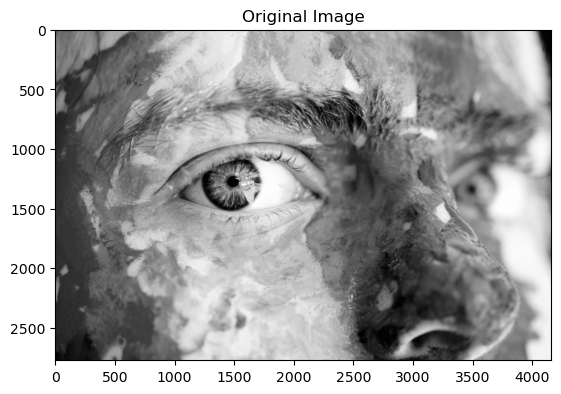

Edge detection using NumPy took 0.41425 seconds


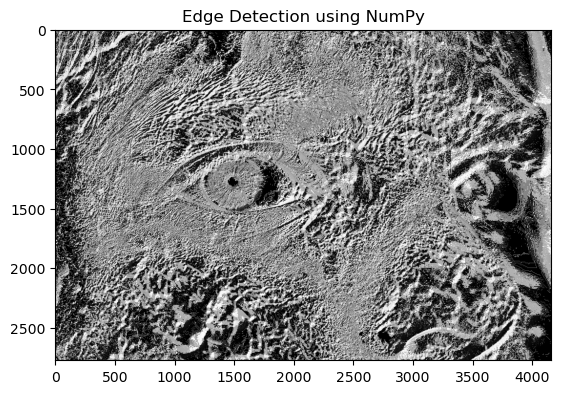

Edge detection using Intel MKL took 0.43731 seconds


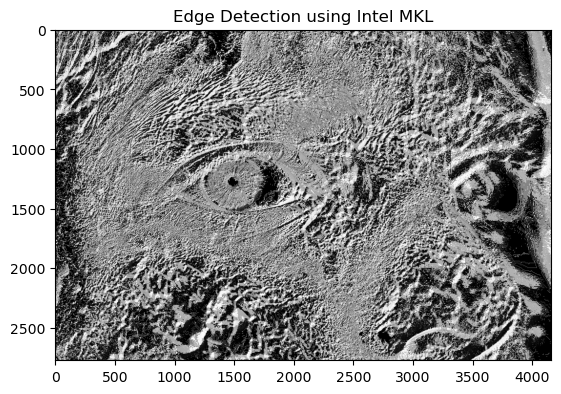

Performance Comparison:
NumPy: 0.41425 seconds
Intel MKL: 0.43731 seconds


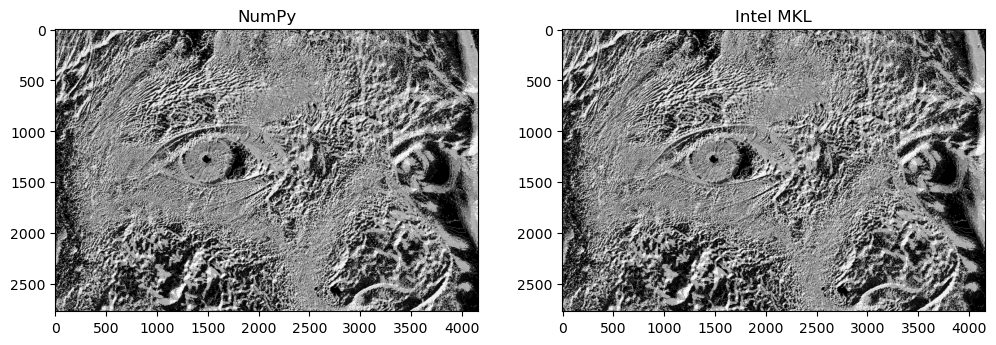

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from time import time


print(np.__config__.show())


image_path = '/Users/karanpandre/Documents/INTERNSHIP/HPC /case_study(28/6)/WhatsApp Image 2024-02-25 at 00.20.12.jpeg'  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

Kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])


def sobel_edge_detection(image):
    Ix = ndimage.convolve(image, Kx)
    Iy = ndimage.convolve(image, Ky)
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    return G


start_time = time()
edges_numpy = sobel_edge_detection(image)
end_time = time()
numpy_time = end_time - start_time
print(f"Edge detection using NumPy took {numpy_time:.5f} seconds")


plt.imshow(edges_numpy, cmap='gray')
plt.title('Edge Detection using NumPy')
plt.show()


def sobel_edge_detection_mkl(image):
    Ix = ndimage.convolve(image, Kx, mode='reflect')
    Iy = ndimage.convolve(image, Ky, mode='reflect')
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    return G


start_time = time()
edges_mkl = sobel_edge_detection_mkl(image)
end_time = time()
mkl_time = end_time - start_time
print(f"Edge detection using Intel MKL took {mkl_time:.5f} seconds")


plt.imshow(edges_mkl, cmap='gray')
plt.title('Edge Detection using Intel MKL')
plt.show()


print("Performance Comparison:")
print(f"NumPy: {numpy_time:.5f} seconds")
print(f"Intel MKL: {mkl_time:.5f} seconds")


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(edges_numpy, cmap='gray')
plt.title('NumPy')

plt.subplot(1, 2, 2)
plt.imshow(edges_mkl, cmap='gray')
plt.title('Intel MKL')

plt.show()
